**AIM:** *To Apply Different ML methods to classify on this dataset, and combine multiple methods to get higher accuracy, approach known as ***Ensemble Machine Learning***

**Overview:**

In this notebook an attempt is made at understanding features while *exploring and visualizing* the heart disease dataset. Basically I tried to show distribution of data, relations between variables and target as well as correlations between each other then did some basic model building.

**Dataset Description:**

The data includes 303 patient level features including if they have heart disease or not. Features are like;

**Age:
Sex:**
0: Female
1: Male
**Chest Pain Type:**
0: Typical Angina
1: Atypical Angina
2: Non-Anginal Pain
3: Asymptomatic
**Resting Blood Pressure:** Person's resting blood pressure.
Cholesterol: Serum Cholesterol in mg/dl
**Fasting Blood Sugar:**
0:Less Than 120mg/ml
1: Greater Than 120mg/ml
**Resting Electrocardiographic Measurement:**
0: Normal
1: ST-T Wave Abnormality
2: Left Ventricular Hypertrophy
Max Heart Rate Achieved: Maximum Heart Rate Achieved
**Exercise Induced Angina:**
1: Yes
0: No 
**etc**


After some usual exploratory data analysis (EDA) I noticed some of the results doesn't make sense, and then I found this topic here. The ultimate guide to this dataset!, his points made sense so I decided to use this dataset after inspecting it: **Heart Disease Cleveland UCI.** from the official repository

Okay, **let's START**

In [ ]:
#1: Loading the Dataset

In [ ]:
# Import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import math
import random
import os
import time
from numpy import interp

# Disabling warnings:
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# Apply some Styles:

cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]
plt.style.use('ggplot')

In [ ]:
# Seeding:

def seed_all(seed):
    
    ''' A function to seed everything for getting stable results and reproducibility'''
    
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42    
seed_all(seed)

x=144
y=123

In [ ]:
# Reading the csv file:
from google.colab import files
uploaded = files.upload()
#train = pd.read_csv("heartDataset.csv")

Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv


In [ ]:
import pandas as pd
import io
#df = pd.read_csv(io.BytesIO(uploaded['heart_cleveland_upload.csv']))
train = pd.read_csv(io.BytesIO(uploaded["heart_cleveland_upload.csv"]))
print(train)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [ ]:
#Print the first "5" records
# and convert into an attractive table
train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
print(
    f'Train data has {train.shape[1]} features, {train.shape[0]} observations.\nTrain features are:\n{train.columns.tolist()}\n'
)

Train data has 14 features, 297 observations.
Train features are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']



In [ ]:
#Let's check for null values:
train.isnull().sum().sum()

0

In [ ]:
# Since there are "0" null values, I have decided to rename the 
# columns for easy understanding ie EDA

# Renaming columns.
train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [ ]:
# Number of unique train observartions (WITHOUT DUPLICATES):

train.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      50
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            4
thalassemia                  3
condition                    2
dtype: int64

In [ ]:
# Further, RENAME cateorical data for easier understanding:

train['sex'] = train['sex'].map({0:'female',1:'male'})

train['chest_pain_type'] = train['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})

train['fasting_blood_sugar'] = train['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

train['rest_ecg'] = train['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

train['exercise_induced_angina'] = train['exercise_induced_angina'].map({0:'no',1:'yes'})

train['st_slope'] = train['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

train['thalassemia'] = train['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})

train['condition'] = train['condition'].map({0:'no_disease', 1:'has_disease'})


In [ ]:
# Apply Masks (MASKING) for easier selection in the future:

categorical = [i for i in train.loc[:,train.nunique()<=10]]
continuous = [i for i in train.loc[:,train.nunique()>=10]]

In [ ]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

**Time for Univariate Analysis**

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe;It takes data, summarizes that data and finds patterns in the data.

Here, we going to inspect how the data distribution is and what patterns we can inspect.**

**Categorical Data:**
Here we can do these observations:

  - Males on the dataset is more than double of the female observations.
  - Most common ches pain type is 'Asymptomatic' ones which is almost 50% of the data
  - 85% of the patients has no high levels of fastin blood sugar.
  - Resing electrocardiographic observations are evenly distributed between normal and left ventricular hypertrophy with ST-T minority
  - 67% of the patients had no exercise induced angina
  - Peak exercise slope seems mainly divided between upsloping and flat.

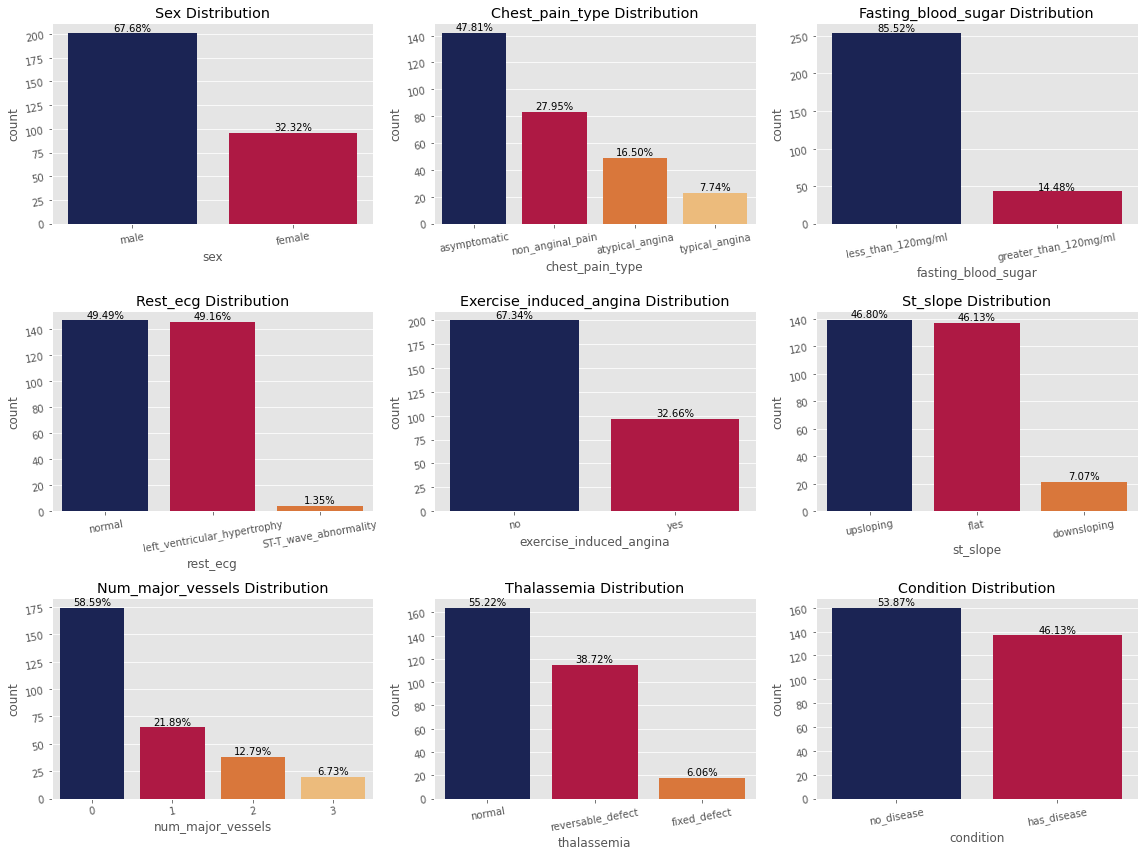

In [ ]:
# Display categorical data:

ctg_dist(train, categorical)